# PRÁCTICAS DE REDES NEURONALES ARTIFICIALES (TSCAO): Parte IV

## 4. Redes Neuronales Recurrentes.

Es útil comprender al menos algunos de los conceptos básicos antes de comenzar con la implementación. Una red neuronal recurrente (RNN) procesa secuencias, ya sea precios diarios de acciones, frases o mediciones de sensores, se procesará por ejemplo un elemento por unidad de tiempo (cada vez) y la RNN mientras tanto retendrá en una memoria (llamada estado) lo que ha sucedido previamente en la secuencia.

Recurrente significa que la salida en el paso de tiempo actual se convierte en la entrada al siguiente paso de tiempo. En cada elemento de la secuencia, el modelo considera no solo la entrada actual, sino lo que recuerda acerca de los elementos anteriores.

Esta memoria permite a la red aprender dependencias a largo plazo en una secuencia, lo que significa que puede tener en cuenta todo el contexto al hacer una predicción, ya sea la siguiente palabra en una frase, una clasificación de sentimientos o la próxima medición de temperatura. Una RNN está diseñada para imitar la forma humana de procesar secuencias: consideramos la oración completa al formar una respuesta en lugar de palabras por sí mismas. 

Hoy por hoy las redes más utilizadas y populares son las redes LSTM (Long Short-Term Memory). En el corazón de una red recurrente LSTM hay una capa de celdas de memoria. Estas RNA mantienen un estado de sus celdas tal que la transmisión de la señal entre las neuronas (información en forma de gradiente) no se pierda a medida que se procesa la secuencia. En cada paso de tiempo, la LSTM considera la entrada actual, el "acarreo" y el estado de la celda.

Las celdas de memoria (unidades neuronales) asociadas a la red LSTM tienen 3 puertas y vectores de peso diferentes: hay una puerta para "olvidar" y descartar información irrelevante; una puerta de "entrada" para manejar la entrada actual, y una puerta de "salida" para producir predicciones en cada paso de tiempo. Sin embargo, como señala Chollet, es infructuoso tratar de asignar significados específicos a cada uno de los elementos de la celda.

La función de cada elemento celular de la LSTM se decide en última instancia por los parámetros (pesos) que se aprenden durante el entrenamiento. Debemos de recordar que el beneficio de una red neuronal recurrente para el aprendizaje de secuencias es que mantiene una memoria de toda la secuencia evitando que se pierda información previa.

A continuación, veremos un ejemplo de predicción de bolsa en las acciones de Google.

Lo primero que haremos será cargar el fichero de datos. Usamos pandas para importar el conjunto de datos y la función _iloc_ para crear una matriz que tenga las dimensiones especificadas [:, 1:2] (haremos la predicción sobre la variable Open)

In [1]:
# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importando el conjunto de datos de entrenamiento

training_set = pd.read_csv("Google_Stock_Price_Train.csv")

# Trabajaremos con la columna "Open"

training_set = training_set.iloc[:, 1:2].values

Normalizaremos los datos y obtendremos el conjunto de entrada y salida para entrenar nuestra red:

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

# Normalizamos el conjunto de entrenamiento

training_set = sc.fit_transform(training_set)

# Obtenemos el conjunto de entrada a la red y el conjunto de salidas,
# X_train es la entrada, y_train es la salida

X_train = training_set[0:1257]
y_train = training_set[1:1258]
X_train = np.reshape(X_train, (1257, 1, 1))

A continuación, vamos a construir nuestra red LSTM. Para ello lo primero que haremos será importar las librerías y paquetes necesarios como keras, Sequential, Dense y LSTM.

In [4]:
### HAY PROBLEMAS CON VERSIONES DE NUMPY SI ES LA 16, 20 JUNTO CON PYTHON 3
### PARA VER LA VERSION EJECUTAR LO SIGUIENTE
### EL PROBLEMA SE SOLUCIONA INSTALANDO LA ULTIMA VERSION.

## NUMPY 1.21.2
## TENSORFLOW 2.8.0

In [5]:
import numpy

print(numpy.__version__)

import tensorflow

print(tensorflow.__version__)


2.0.2


2025-02-22 16:01:26.306896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740236486.319769  304275 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740236486.323875  304275 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-22 16:01:26.339735: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.18.0


In [6]:
# Parte 2 - Construyendo La Red Neuronal Recurrente
# Importando las librerías y paquetes

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Inicializando la RNN
# utilizamos un modelo continuo, modelo de regresión

regressor = Sequential()

# Añadimos una capa de entrada y la capa LSTM

regressor.add(LSTM(units=4, activation="sigmoid", input_shape=(None, 1)))

# Añadimos la capa de salida con una única neurona

regressor.add(Dense(units=1))

# Compilamos la RNN
# usamos el error cuadrático medio
# MSE para la regresión

regressor.compile(optimizer="adam", loss="mean_squared_error")

# Ajustamos la RNN al conjunto de entrenamiento

regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200


2025-02-22 16:01:27.436654: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-22 16:01:27.436675: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: pop-os
2025-02-22 16:01:27.436680: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: pop-os
2025-02-22 16:01:27.436781: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 565.77.0
2025-02-22 16:01:27.436796: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 565.77.0
2025-02-22 16:01:27.436801: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 565.77.0
/home/migue8gl/Master/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1196   
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.1032
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0969 
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0950 
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0923 
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0934 
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0858 
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0862 
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0811 
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0792 
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0749 
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0716 
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0727 
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0674 
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0663

Ahora que hemos entrenado el modelo debemos hacer la predicción y visualización de los resultados:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


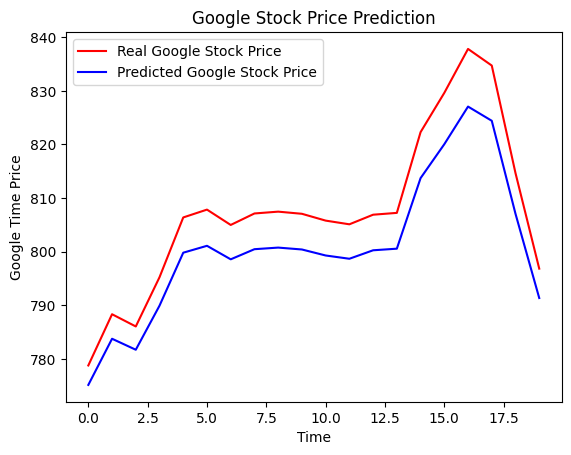

In [7]:
# Parte 3 – Hacer las predicciones y visualizar los resultados

# Obtener el precio real de las acciones de 2017
test_set = pd.read_csv("Google_Stock_Price_Test.csv", sep=",")
real_stock_price = test_set.iloc[:, 1:2].values


# Obtener el precio de las acciones previsto para 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# Visualizando los resultados
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Time Price")
plt.legend()
plt.show()

**Actividad**: A continuación, realizad diferentes pruebas con topologías variadas y con número de entradas distintas, manipulando el conjunto de entrenamiento tanto de salida como de entrada con distintos pasos temporales. Construir una tabla con diferentes configuraciones tanto de aprendizaje como de topologías. Tomar conclusiones de dicha tabla, seleccionar la mejor opción y explicar por qué.

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error


def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(timesteps, len(data)):
        X.append(data[i - timesteps : i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    X = np.reshape(X, (X.shape[0], timesteps, 1))
    return X, y


def build_model1(timesteps):
    model = Sequential()
    model.add(LSTM(units=50, activation="tanh", input_shape=(timesteps, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


def build_model2(timesteps):
    model = Sequential()
    model.add(LSTM(units=50, activation="tanh", input_shape=(timesteps, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


def build_model3(timesteps):
    model = Sequential()
    model.add(
        LSTM(
            units=50,
            activation="tanh",
            return_sequences=True,
            input_shape=(timesteps, 1),
        )
    )
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation="tanh"))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


def build_model4(timesteps):
    model = Sequential()
    model.add(
        LSTM(
            units=20,
            activation="tanh",
            return_sequences=True,
            input_shape=(timesteps, 1),
        )
    )
    model.add(Dropout(0.3))
    model.add(LSTM(units=20, activation="tanh"))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


def run_experiment(
    model_builder, timesteps, model_label, topology, batch_size, epochs, observations
):
    X_train_mod, y_train_mod = prepare_data(training_set, timesteps)
    model = model_builder(timesteps)
    model.fit(X_train_mod, y_train_mod, epochs=epochs, batch_size=batch_size, verbose=0)
    test_data = sc.transform(real_stock_price)
    X_test_mod, y_test_mod = prepare_data(test_data, timesteps)
    predicted = model.predict(X_test_mod)
    predicted = sc.inverse_transform(predicted)
    y_test_inv = sc.inverse_transform(y_test_mod.reshape(-1, 1))
    mse = mean_squared_error(y_test_inv, predicted)
    return (
        {
            "Modelo": model_label,
            "Topología": topology,
            "Timestep": timesteps,
            "Batch Size": batch_size,
            "Épocas": epochs,
            "MSE": mse,
            "Observaciones": observations,
        },
        predicted,
        y_test_inv,
    )


resultados = []
r1, predicted1, y_test1 = run_experiment(
    build_model1,
    1,
    "Opción 1",
    "1 capa LSTM (50 unidades), sin Dropout",
    32,
    200,
    "Buen desempeño en capturar tendencias generales.",
)
resultados.append(r1)
r1_5, predicted1_5, y_test1_5 = run_experiment(
    build_model1,
    5,
    "Opción 1.5",
    "1 capa LSTM (50 unidades), sin Dropout",
    32,
    200,
    "Buen desempeño en capturar tendencias generales.",
)
resultados.append(r1_5)
r2, predicted2, y_test2 = run_experiment(
    build_model2,
    1,
    "Opción 2",
    "1 capa LSTM (50 unidades) + Dropout (20%)",
    32,
    200,
    "La regularización mejora la generalización.",
)
resultados.append(r2)
r2_5, predicted2_5, y_test2_5 = run_experiment(
    build_model2,
    5,
    "Opción 2.5",
    "1 capa LSTM (50 unidades) + Dropout (20%)",
    32,
    200,
    "La regularización mejora la generalización.",
)
resultados.append(r2_5)
r3, predicted3, y_test3 = run_experiment(
    build_model3,
    1,
    "Opción 3",
    "2 capas LSTM (50 unidades c/u) + Dropout (20%)",
    32,
    200,
    "Captura dependencias temporales complejas; riesgo de sobreajuste moderado.",
)
resultados.append(r3)
r3_5, predicted3_5, y_test3_5 = run_experiment(
    build_model3,
    5,
    "Opción 3",
    "2 capas LSTM (50 unidades c/u) + Dropout (20%)",
    32,
    200,
    "Captura dependencias temporales complejas; riesgo de sobreajuste moderado.",
)
resultados.append(r3_5)
r4, predicted4, y_test4 = run_experiment(
    build_model4,
    1,
    "Opción 4",
    "2 capas LSTM (20 unidades c/u) + Dropout (30%)",
    32,
    200,
    "Modelo más conservador; reduce sobreajuste en casos de pocos datos.",
)
resultados.append(r4)
r4_5, predicted4_5, y_test4_5 = run_experiment(
    build_model4,
    5,
    "Opción 4",
    "2 capas LSTM (20 unidades c/u) + Dropout (30%)",
    32,
    200,
    "Modelo más conservador; reduce sobreajuste en casos de pocos datos.",
)
resultados.append(r4_5)
tabla_resultados = pd.DataFrame(resultados)
print(tabla_resultados)
mejor_modelo = min(resultados, key=lambda x: x["MSE"])
print("\nMejor modelo:")
print(mejor_modelo)


/home/migue8gl/Master/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


/home/migue8gl/Master/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


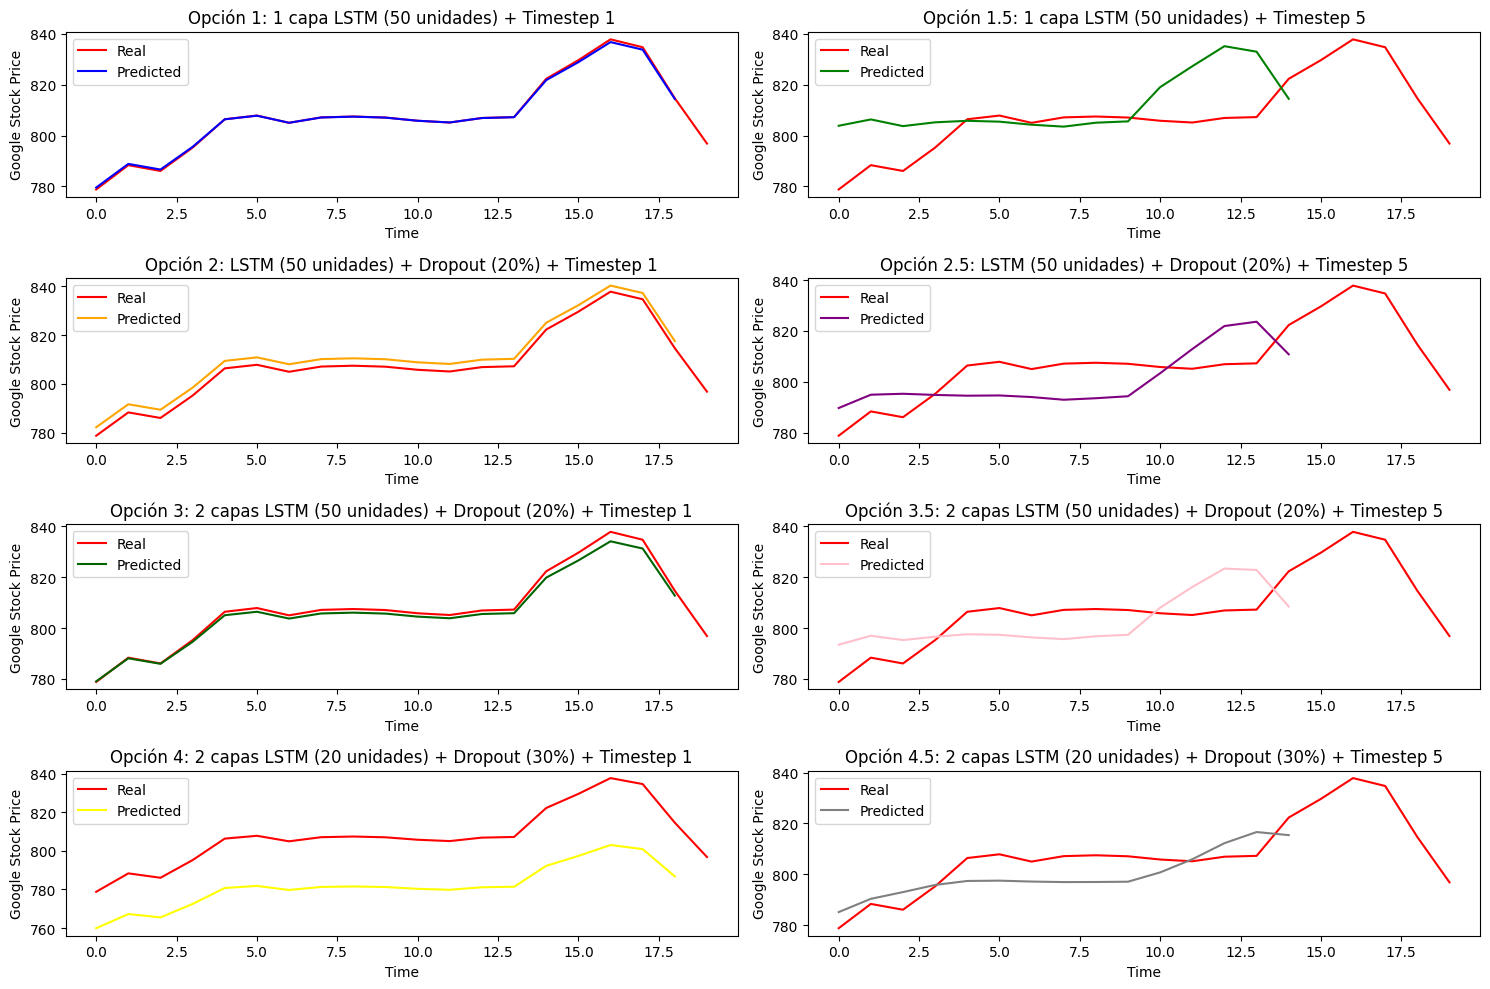

In [ ]:
import matplotlib.pyplot as plt


def plot_subplots(real, predictions, titles, colors):
    fig, axs = plt.subplots(4, 2, figsize=(15, 10))
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        ax.plot(real[i], color="red", label="Real")
        ax.plot(predictions[i], color=colors[i], label="Predicted")
        ax.set_title(titles[i])
        ax.set_xlabel("Time")
        ax.set_ylabel("Google Stock Price")
        ax.legend()
    plt.tight_layout()
    plt.show()


preds = [
    predicted1,
    predicted1_5,
    predicted2,
    predicted2_5,
    predicted3,
    predicted3_5,
    predicted4,
    predicted4_5,
]
real = [y_test1, y_test1_5, y_test2, y_test2_5, y_test3, y_test3_5, y_test4, y_test4_5]
titles = [
    "Opción 1: 1 capa LSTM (50 unidades) + Timestep 1",
    "Opción 1.5: 1 capa LSTM (50 unidades) + Timestep 5",
    "Opción 2: LSTM (50 unidades) + Dropout (20%) + Timestep 1",
    "Opción 2.5: LSTM (50 unidades) + Dropout (20%) + Timestep 5",
    "Opción 3: 2 capas LSTM (50 unidades) + Dropout (20%) + Timestep 1",
    "Opción 3.5: 2 capas LSTM (50 unidades) + Dropout (20%) + Timestep 5",
    "Opción 4: 2 capas LSTM (20 unidades) + Dropout (30%) + Timestep 1",
    "Opción 4.5: 2 capas LSTM (20 unidades) + Dropout (30%) + Timestep 5",
]
colors = ["blue", "green", "orange", "purple", "darkgreen", "pink", "yellow", "grey"]

plot_subplots(real, preds, titles, colors)
